<a href="https://www.kaggle.com/code/jamesdavey/s-rensen-dice-coefficient-for-training-data?scriptVersionId=122514402" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sørensen–Dice coefficient for the Vesuvius Challenge

From Wikipedia: 

Given two (discrete) sets, X and Y, it is defined as:

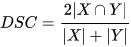

Alternatively, as we are using boolean data here we could use the formula below (both give equivalent  results):

Using the definition of true positive (TP), false positive (FP), and false negative (FN), it can be written as:

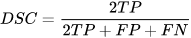

For this notebook I will be using the mask as our predictions.

In [46]:
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

def find_dice_coefficient1(img_ink_mask, img_ink_labels):
    # img_ink_mask are the predictions here
    dice_coefficient = 2*((img_ink_labels==1)*(img_ink_labels == img_ink_mask)).sum()/((img_ink_mask==1).sum()+(img_ink_labels==1).sum())
    return round(dice_coefficient, 4)

def find_dice_coefficient2(img_ink_mask, img_ink_labels):
    TP = ((img_ink_mask == 1) * (img_ink_labels==1)).sum()
    FP = ((img_ink_mask == 1) * (img_ink_labels == 0)).sum()
    FN = ((img_ink_mask == 0) * (img_ink_labels == 1)).sum()
    dice_coefficient= 2*TP/(2*TP + FP + FN)
    return round(dice_coefficient, 4)

def print_coefficient(image_num):
    filepath = f'/kaggle/input/vesuvius-challenge-ink-detection/train/{image_num}/'
    img_ink_labels = np.array(Image.open(filepath+'inklabels.png'))
    img_ink_mask = np.array(Image.open(filepath+'mask.png'))
    print(f"Sørensen–Dice coefficient for train image {image_num}:")
    print("formula 1:", find_dice_coefficient1(img_ink_mask, img_ink_labels))
    print("formula 2:", find_dice_coefficient2(img_ink_mask, img_ink_labels))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img_ink_labels, cmap = 'gray')
    ax2.imshow(img_ink_mask, cmap = 'gray')
    plt.show()

Sørensen–Dice coefficient for train image 1:
formula 1: 0.3097
formula 2: 0.3097


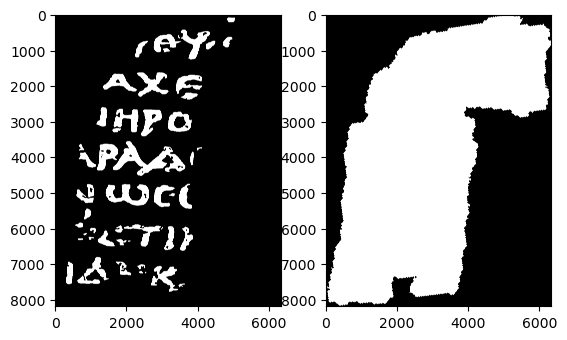

In [47]:
print_coefficient(1)

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:3077: DecompressionBombWarning: Image size (140973980 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Sørensen–Dice coefficient for train image 2:
formula 1: 0.2941
formula 2: 0.2941


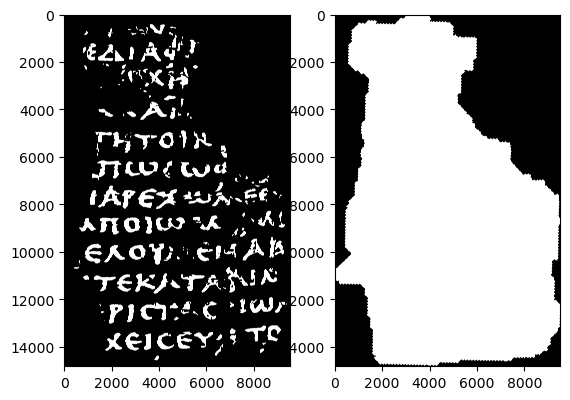

In [48]:
print_coefficient(2)

Sørensen–Dice coefficient for train image 3:
formula 1: 0.2247
formula 2: 0.2247


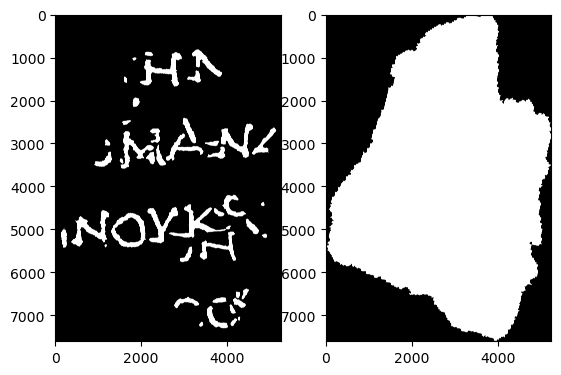

In [49]:
print_coefficient(3)

## Conclusion

We see that for less densely distributed labels within the mask we have a lower Sørensen–Dice coefficient.

This leads me to believe the labels within the test dataset are more sparely distributed.